### Kernel Nearest Neighbors

<img src='knn.png'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advt = pd.read_csv('advertising.csv')
heart = pd.read_csv('heart.csv')

In [6]:
advt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [7]:
advt.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [8]:
advt.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


In [10]:
advt['City'].nunique()

969

In [11]:
advt['Country'].nunique()

237

In [12]:
advt.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [13]:
x_ad = advt[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]
y_ad = advt['Clicked on Ad']

In [14]:
x_ad.shape

(1000, 5)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain_ad, xtest_ad, ytrain_ad, ytest_ad = train_test_split(x_ad,y_ad,
                                                test_size=0.2, random_state=50)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model_knn = KNeighborsClassifier(n_neighbors=5).fit(xtrain_ad, ytrain_ad)

In [19]:
model_knn.score(xtest_ad, ytest_ad)*100

71.5

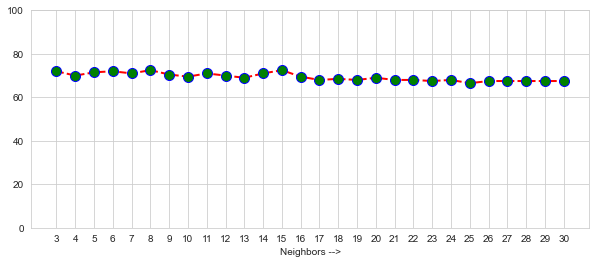

In [23]:
sns.set_style('whitegrid')
scores = []
for n in range(3,31):    
    model_n = KNeighborsClassifier(n_neighbors=n).fit(xtrain_ad, ytrain_ad)
    scores += [model_n.score(xtest_ad, ytest_ad)*100]

plt.figure(figsize=(10,4))
plt.plot(range(3,31),scores, marker='o',lw=2,color='r',
         markeredgecolor='b',markerfacecolor='g',ls='--',markersize=10)
plt.xticks(range(3,31))
plt.xlabel('Neighbors -->')
plt.ylim([0,100])
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
x_ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000
std,15.853615,8.785562,13414.634022,43.902339,0.499889
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


In [28]:
x_ad_sc = pd.DataFrame(StandardScaler().fit_transform(x_ad),columns=x_ad.columns)
x_ad_sc.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.249267,-0.114905,0.509691,1.734030,-0.962695
1,0.961132,-0.570425,1.002530,0.313805,1.038750


In [29]:
x_ad_sc.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-4.396483e-16,-2.486900e-17,-3.830269e-16,-7.890216e-17,-1.176836e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.044733e+00,-1.936986e+00,-3.058154e+00,-1.714208e+00,-9.626953e-01
25%,-8.608147e-01,-7.981854e-01,-5.942901e-01,-9.382348e-01,-9.626953e-01
50%,2.028817e-01,-1.149050e-01,1.500829e-01,7.132800e-02,-9.626953e-01
75%,8.549520e-01,6.822554e-01,7.809288e-01,8.840488e-01,1.038750e+00
max,1.667949e+00,2.845977e+00,1.826144e+00,2.050117e+00,1.038750e+00


In [31]:
xtrain_ad_sc, xtest_ad_sc, ytrain_ad_sc, ytest_ad_sc = train_test_split(x_ad_sc,y_ad,
                                                test_size=0.2, random_state=50)

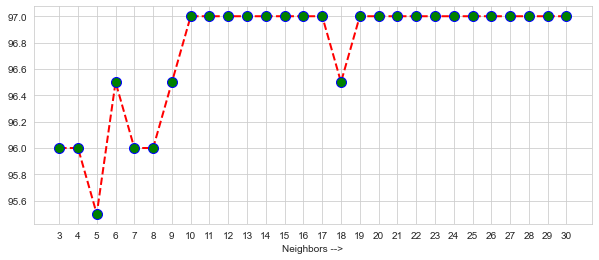

In [33]:
sns.set_style('whitegrid')
scores = []
for n in range(3,31):    
    model_n = KNeighborsClassifier(n_neighbors=n).fit(xtrain_ad_sc, ytrain_ad_sc)
    scores += [model_n.score(xtest_ad_sc, ytest_ad_sc)*100]

plt.figure(figsize=(10,4))
plt.plot(range(3,31),scores, marker='o',lw=2,color='r',
         markeredgecolor='b',markerfacecolor='g',ls='--',markersize=10)
plt.xticks(range(3,31))
plt.xlabel('Neighbors -->')
# plt.ylim([0,100])
plt.show()

In [34]:
x_h = heart.drop('target',axis=1)
y_h = heart['target']

In [35]:
x_h.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [36]:
x_hsc = pd.DataFrame(StandardScaler().fit_transform(x_h),columns=x_h.columns)

In [37]:
xtrain_h, xtest_h, ytrain_h, ytest_h = train_test_split(x_h,y_h,test_size=0.2,
                                                        random_state=100)
xtrain_hsc, xtest_hsc, ytrain_hsc, ytest_hsc = train_test_split(x_hsc,y_h,test_size=0.2,
                                                        random_state=100)

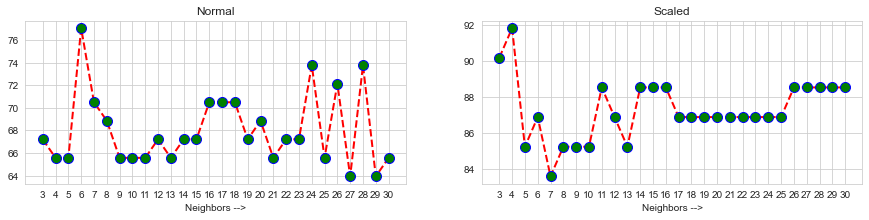

In [42]:
sns.set_style('whitegrid')
scores = []
scores1 = []
for n in range(3,31):    
    model_n = KNeighborsClassifier(n_neighbors=n).fit(xtrain_h, ytrain_h)
    model_n1 = KNeighborsClassifier(n_neighbors=n).fit(xtrain_hsc, ytrain_hsc)
    scores += [model_n.score(xtest_h, ytest_h)*100]
    scores1 += [model_n1.score(xtest_hsc, ytest_hsc)*100]

plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
plt.plot(range(3,31),scores, marker='o',lw=2,color='r',
         markeredgecolor='b',markerfacecolor='g',ls='--',markersize=10)
plt.xticks(range(3,31))
plt.title('Normal')
plt.xlabel('Neighbors -->')

plt.subplot(1,2,2)
plt.plot(range(3,31),scores1, marker='o',lw=2,color='r',
         markeredgecolor='b',markerfacecolor='g',ls='--',markersize=10)
plt.xticks(range(3,31))
plt.title('Scaled')
plt.xlabel('Neighbors -->')

plt.show()